In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("success")
sns.set()

success


In [2]:
df = pd.read_csv("data/data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data cleanup

In [3]:
def iqr_clean(df, columns):
    for cl in columns:
        q_25 = df[cl].quantile(.25)
        q_75 = df[cl].quantile(.75)
        iqr = q_75 - q_25
        df_clean = df[(df[cl] >= q_25 - iqr * 1.5) & (df[cl] <= q_75 + iqr * 1.5)]
    return df_clean

In [4]:
print(df["age"].describe())
print(df["bmi"].describe())
print(df["avg_glucose_level"].describe())

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


In [5]:
df = df.dropna()
df = df[df["gender"] != "Other"]
columns = ["age", "bmi", "avg_glucose_level"]
df = iqr_clean(df, columns)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4339 non-null   int64  
 1   gender             4339 non-null   object 
 2   age                4339 non-null   float64
 3   hypertension       4339 non-null   int64  
 4   heart_disease      4339 non-null   int64  
 5   ever_married       4339 non-null   object 
 6   work_type          4339 non-null   object 
 7   Residence_type     4339 non-null   object 
 8   avg_glucose_level  4339 non-null   float64
 9   bmi                4339 non-null   float64
 10  smoking_status     4339 non-null   object 
 11  stroke             4339 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 440.7+ KB


# Descriptive statistics + plots

count    4339.000000
mean       40.617073
std        22.301481
min         0.080000
25%        23.000000
50%        41.000000
75%        57.000000
max        82.000000
Name: age, dtype: float64


<Axes: >

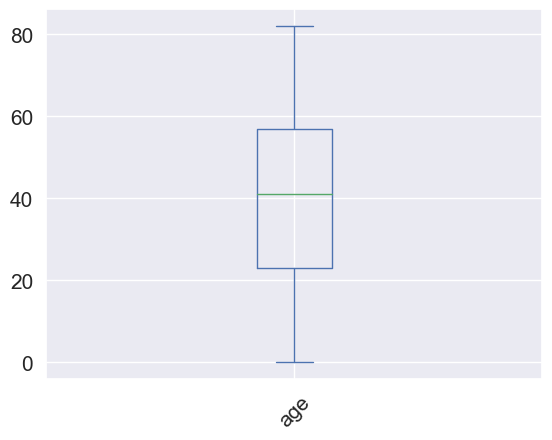

In [7]:
print(df["age"].describe())
df.plot.box(column=['age'], grid=True, rot=45, fontsize=15) 

count    4339.000000
mean       28.311086
std         7.651916
min        10.300000
25%        23.100000
50%        27.600000
75%        32.400000
max        97.600000
Name: bmi, dtype: float64


<Axes: >

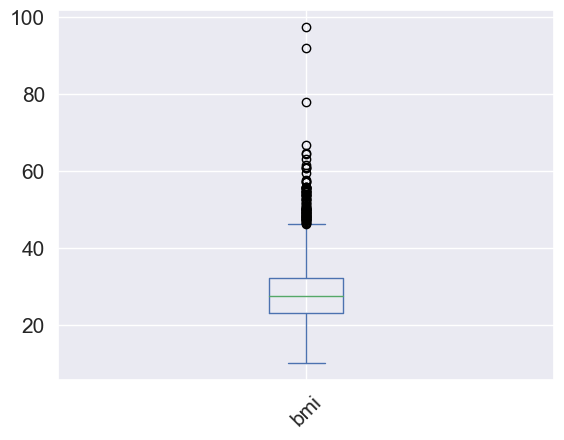

In [8]:
print(df["bmi"].describe())
df.plot.box(column=['bmi'], grid=True, rot=45, fontsize=15) 

Text(0, 0.5, 'frequency')

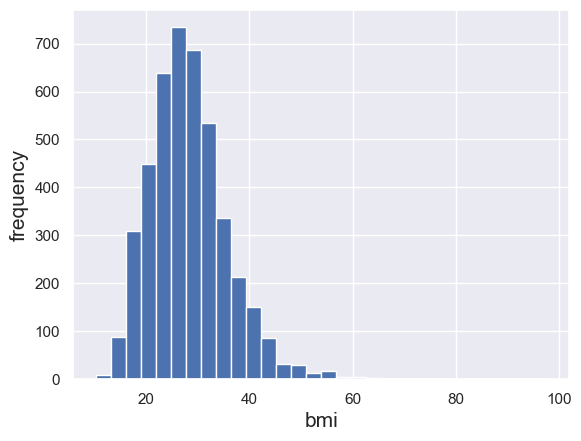

In [9]:
df["bmi"].hist(bins=30)
plt.xlabel("bmi", fontsize=15)
plt.ylabel("frequency", fontsize=15)

count       4339
unique         2
top       Female
freq        2595
Name: gender, dtype: object


<Axes: ylabel='count'>

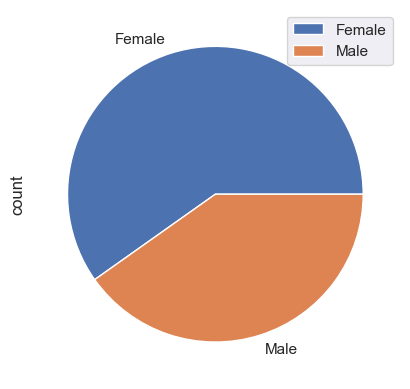

In [10]:
print(df["gender"].describe())
dff = df.groupby(by=["gender"]).count()
dff["count"] = dff["id"]
dff.plot(kind='pie', y='count')

count             4339
unique               4
top       never smoked
freq              1604
Name: smoking_status, dtype: object
['never smoked' 'Unknown' 'smokes' 'formerly smoked']


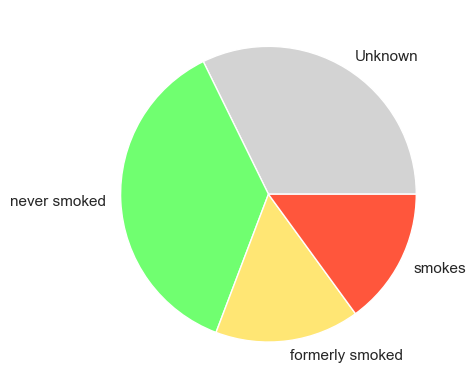

In [11]:
print(df["smoking_status"].describe())
dff = df.groupby(by=["smoking_status"]).count()
dff["count"] = dff["id"]
print(df["smoking_status"].unique())
dff["idx"] = [0,2,1,3]
dff = dff.sort_values(by=['idx'])
plot = dff.plot(kind='pie', y='count', colors=["#D3D3D3", "#70FF70", "#FFE674", "#FF563C"], ylabel="", legend=False)

# Detailed overview

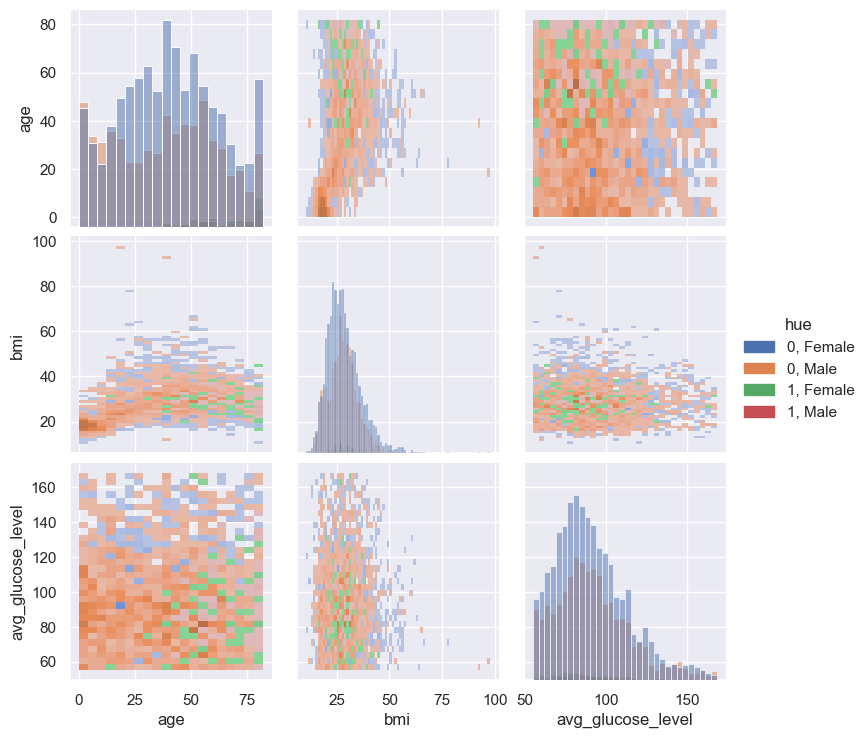

In [12]:
df_new = df
drop = ["id"]
df_new = df_new.drop(drop, axis=1)
df_new = df_new.replace({"Male": 1, "Female": 0})

df_new["hue"] = df[['stroke', 'gender']].apply(
    lambda row: f"{row.stroke}, {row.gender}", axis=1)

df_new = df_new.sort_values(by=["hue"])

pp = sns.pairplot(df_new[["age", "bmi", "avg_glucose_level", "hue"]], hue="hue", kind="hist")

In [13]:
def df_one_hot(df, columns):
    for column in columns:
        one_hot = pd.get_dummies(df[column], dtype=bool)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)
    return df

Text(0.5, 0.98, 'Health status')

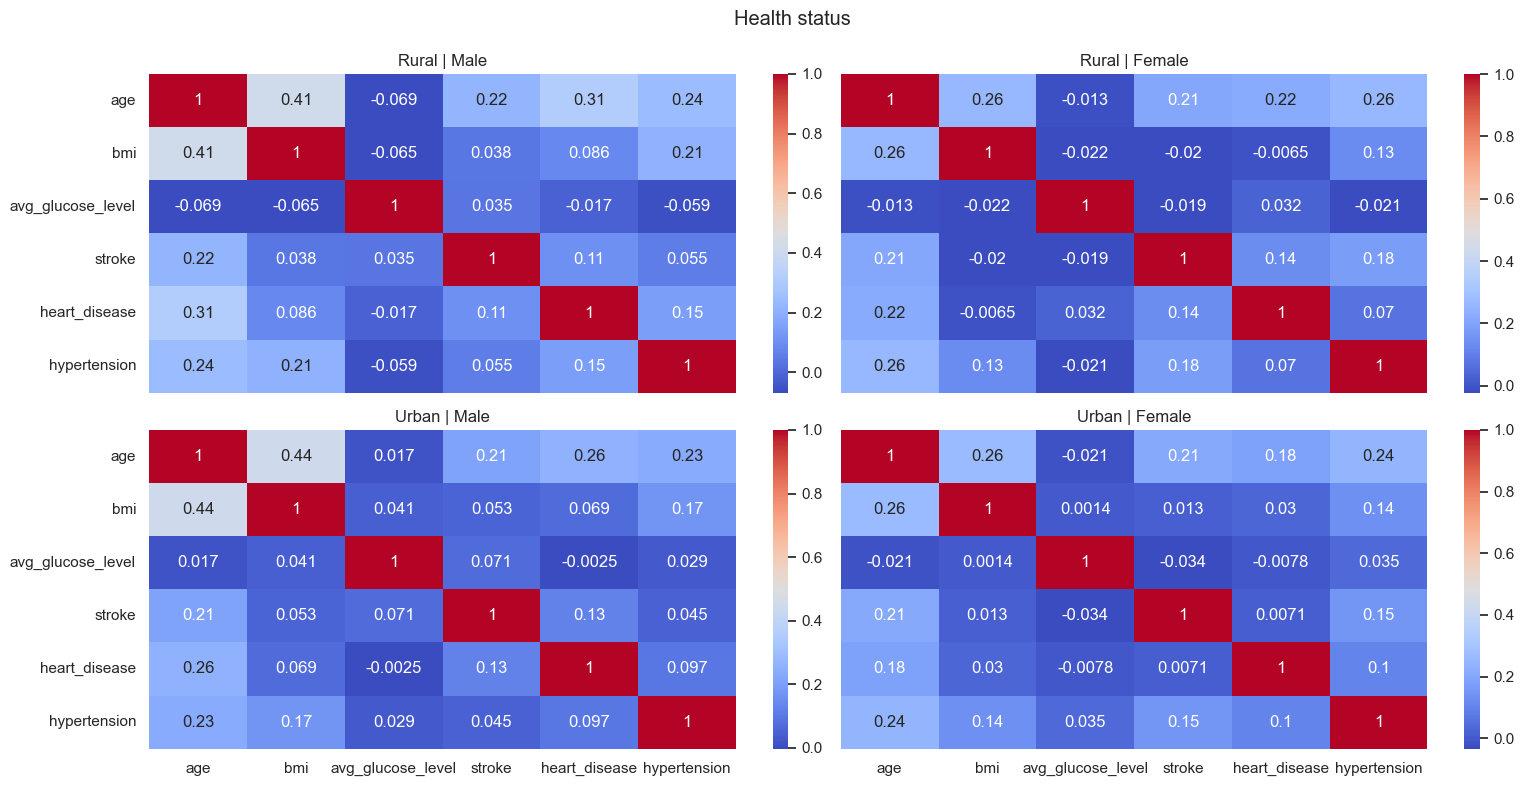

In [14]:
df_new = df[["age", "bmi", "avg_glucose_level", "heart_disease", "hypertension", "stroke"]]

def corr_func(data, plot_func, *args, **kwargs):
    plot_func(data=data[["age", "bmi", "avg_glucose_level", "stroke", "heart_disease", "hypertension"]].corr(), *args, **kwargs)

g = sns.FacetGrid(df, row="Residence_type", col="gender", height=4, aspect=2)
g.set_titles(col_template="{col_name}", row_template="{row_name}", fontsize=20)
g.map_dataframe(corr_func, plot_func=sns.heatmap, cmap="coolwarm", annot=True)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Health status')

Text(0.5, 0.98, 'Life')

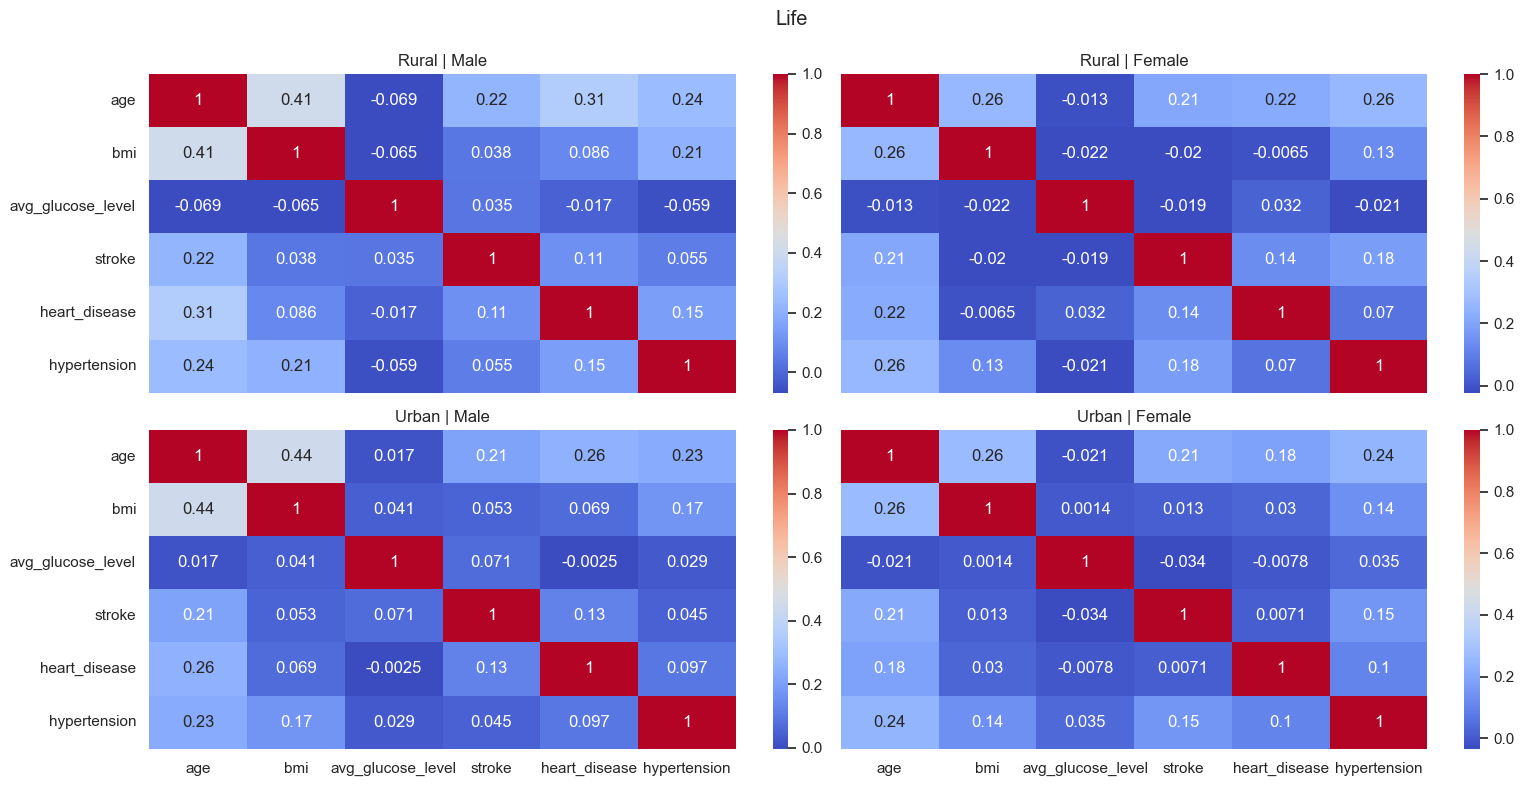

In [15]:
df_new = df[["age", "bmi", "avg_glucose_level", "heart_disease", "hypertension", "stroke"]]

def corr_func(data, plot_func, *args, **kwargs):
    plot_func(data=data[["age", "bmi", "avg_glucose_level", "stroke", "heart_disease", "hypertension"]].corr(), *args, **kwargs)

g = sns.FacetGrid(df, row="Residence_type", col="gender", height=4, aspect=2)
g.set_titles(col_template="{col_name}", row_template="{row_name}", fontsize=20)
g.map_dataframe(corr_func, plot_func=sns.heatmap, cmap="coolwarm", annot=True)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Life')

# Hypothesis

How does the place of life affect health?

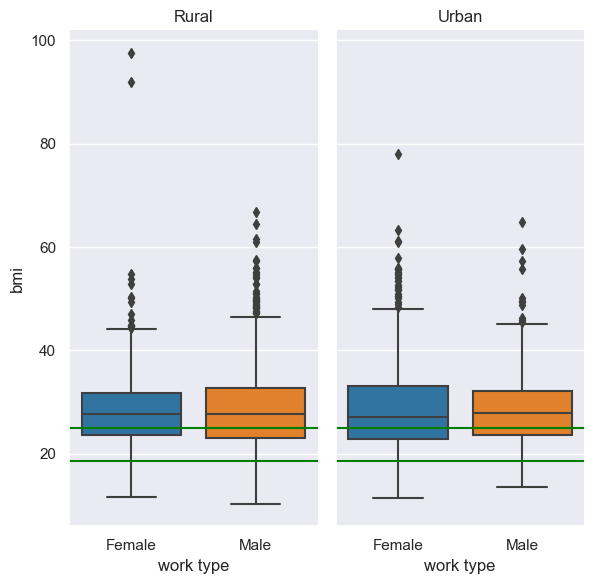

In [75]:
hp_df = df#[["gender", "Residence_type", "bmi"]].groupby(by=["Residence_type", "gender"]).mean()
#hp_df = hp_df.reset_index()
g = sns.FacetGrid(hp_df, col="Residence_type", height=6, aspect=0.5)
g.set_titles(col_template="{col_name}", fontsize=30)
g.map_dataframe(sns.boxplot, x="gender", y="bmi",palette="tab10")
g.refline(y=18.5, color='green', linestyle='-',)
g.refline(y=25, color='green', linestyle='-',)
g.set(ylabel='bmi', xlabel='work type')
g.add_legend()
plt.show()


In [77]:
hp_df = df
hp_df.groupby(by=["work_type", "gender", "Residence_type"]).count()

id  age  hypertension  heart_disease   
work_type     gender Residence_type                                          
Govt_job      Female Rural           160  160           160            160  \
                     Urban           180  180           180            180   
              Male   Rural           101  101           101            101   
                     Urban           102  102           102            102   
Never_worked  Female Rural             2    2             2              2   
                     Urban             9    9             9              9   
              Male   Rural             5    5             5              5   
                     Urban             6    6             6              6   
Private       Female Rural           763  763           763            763   
                     Urban           759  759           759            759   
              Male   Rural           482  482           482            482   
                     Urban           472  472           472            472   
Self-employed Female Rural           191  191           191            191   
                     Urban           215  215           215            215   
              Male   Rural           108  108           108            108   
                     Urban           122  122           122            122   
children      Female Rural           163  163           163            163   
                     Urban           153  153           153            153   
              Male   Rural           165  165           165            165   
                     Urban           181  181           181            181   

                                     ever_married  avg_glucose_level  bmi   
work_type     gender Residence_type                                         
Govt_job      Female Rural                    160                160  160  \
                     Urban                    180                180  180   
              Male   Rural                    101                101  101   
                     Urban                    102                102  102   
Never_worked  Female Rural                      2                  2    2   
                     Urban                      9                  9    9   
              Male   Rural                      5                  5    5   
                     Urban                      6                  6    6   
Private       Female Rural                    763                763  763   
                     Urban                    759                759  759   
              Male   Rural                    482                482  482   
                     Urban                    472                472  472   
Self-employed Female Rural                    191                191  191   
                     Urban                    215                215  215   
              Male   Rural                    108                108  108   
                     Urban                    122                122  122   
children      Female Rural                    163                163  163   
                     Urban                    153                153  153   
              Male   Rural                    165                165  165   
                     Urban                    181                181  181   

                                     smoking_status  stroke  proportion  
work_type     gender Residence_type                                      
Govt_job      Female Rural                      160     160         160  
                     Urban                      180     180         180  
              Male   Rural                      101     101         101  
                     Urban                      102     102         102  
Never_worked  Female Rural                        2       2           2  
                     Urban                        9       9           9  
              Male   Rural        

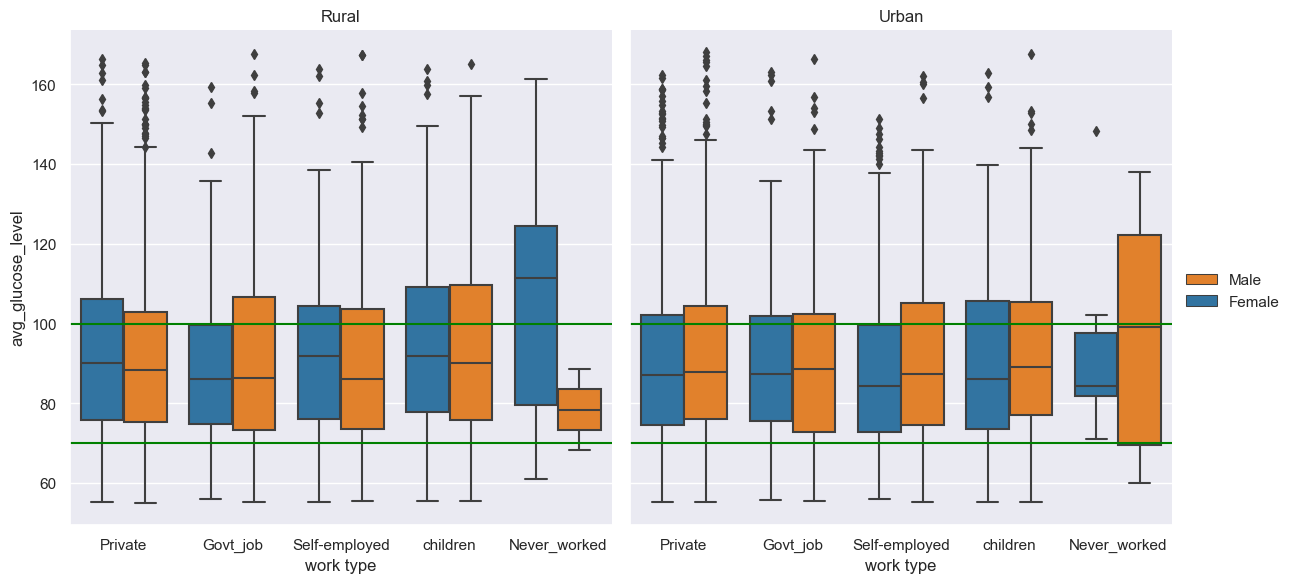

In [58]:
hp_df = df
g = sns.FacetGrid(hp_df, col="Residence_type", height=6, aspect=1)
g.set_titles(col_template="{col_name}", fontsize=30)
g.map_dataframe(sns.boxplot, x="work_type", y="avg_glucose_level", hue="gender", palette="tab10")
g.refline(y=70, color='green', linestyle='-',)
g.refline(y=100, color='green', linestyle='-',)
g.set(ylabel='avg_glucose_level', xlabel='work type')
g.add_legend()
plt.show()

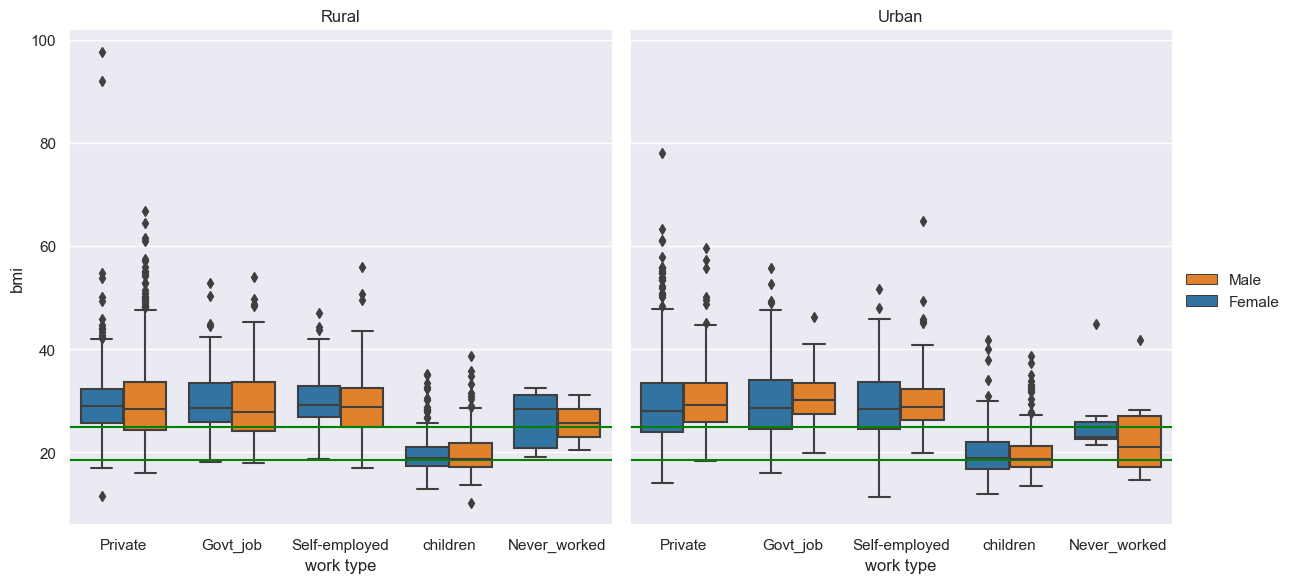

In [59]:
hp_df = df
g = sns.FacetGrid(hp_df, col="Residence_type", height=6, aspect=1)
g.set_titles(col_template="{col_name}", fontsize=30)
g.map_dataframe(sns.boxplot, x="work_type", y="bmi", hue="gender", palette="tab10")
g.refline(y=18.5, color='green', linestyle='-',)
g.refline(y=25, color='green', linestyle='-',)
g.set(ylabel='bmi', xlabel='work type')
g.add_legend()
plt.show()

,gender,Residence_type,proportion
0,Male,Rural,3.02
1,Female,Urban,3.12
2,Male,Urban,3.17
3,Female,Rural,3.21


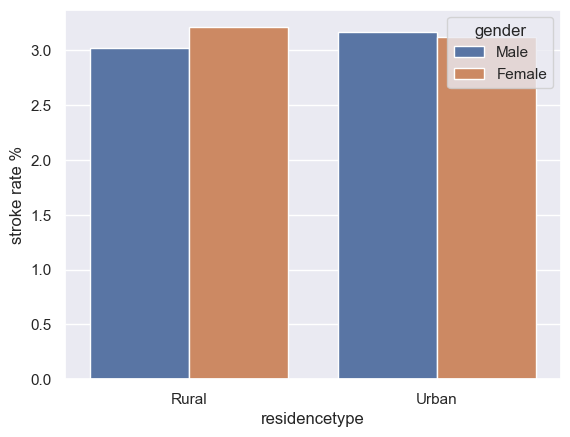

In [16]:
hp_df = df
hp_df["proportion"] = hp_df["id"]
hp_df = (hp_df[hp_df["stroke"] == 1].groupby(by=["gender", "Residence_type"]).count() / hp_df.groupby(by=["gender", "Residence_type"]).count() * 100).round(2).sort_values(by=["id"])[['proportion']]
hp_df = hp_df.reset_index() 
display(hp_df)
ax = sns.barplot(x="Residence_type", 
           y="proportion", 
           hue="gender", 
           data=hp_df) 
ax.set(ylabel='stroke rate %', xlabel='residencetype')
plt.show()

,gender,Residence_type,proportion
0,Female,Urban,1.90
1,Female,Rural,2.66
2,Male,Urban,5.55
3,Male,Rural,5.57


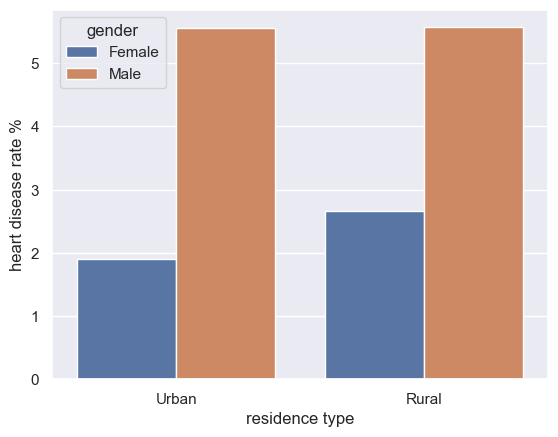

In [17]:
hp_df = df
hp_df["proportion"] = hp_df["id"]
hp_df = (hp_df[hp_df["heart_disease"] == 1].groupby(by=["gender", "Residence_type"]).count() / hp_df.groupby(by=["gender", "Residence_type"]).count() * 100).round(2).sort_values(by=["id"])[['proportion']]
hp_df = hp_df.reset_index() 
display(hp_df)
ax = sns.barplot(x="Residence_type", 
           y="proportion", 
           hue="gender", 
           data=hp_df) 
ax.set(ylabel='heart disease rate %', xlabel='residence type')
plt.show()

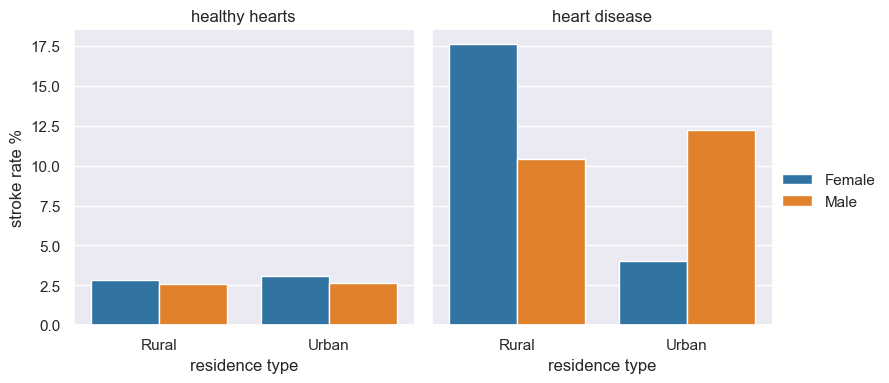

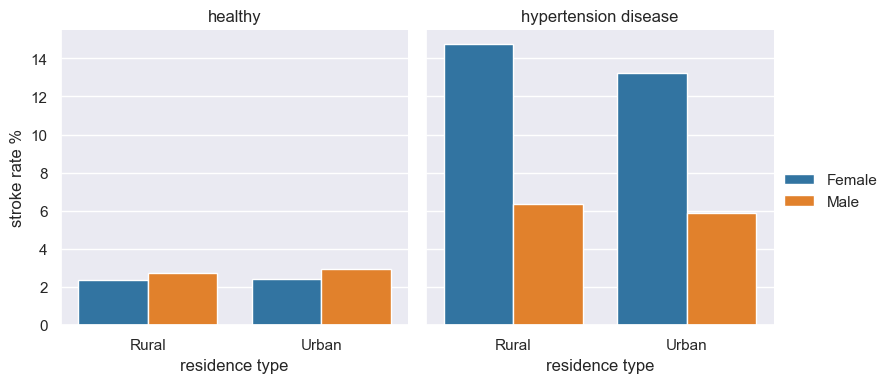

In [31]:
hp_df = df
hp_df["proportion"] = hp_df["id"]
hp_df = (hp_df[hp_df["stroke"] == 1].groupby(by=["gender", "Residence_type", "heart_disease"]).count() / hp_df.groupby(by=["gender", "Residence_type", "heart_disease"]).count() * 100).round(2)[['proportion']]
hp_df = hp_df.reset_index()
hp_df["heart_disease"] = hp_df["heart_disease"].map({1: "heart disease", 0: "healthy hearts"})
# display(hp_df)

g = sns.FacetGrid(hp_df, col="heart_disease", height=4, aspect=1)
g.set_titles(col_template="{col_name}", fontsize=20)
g.map_dataframe(sns.barplot, x="Residence_type", y="proportion", hue="gender", palette="tab10")
g.set(ylabel='stroke rate %', xlabel='residence type')
g.add_legend()
plt.show()


hp_df = df
hp_df["proportion"] = hp_df["id"]
hp_df = (hp_df[hp_df["stroke"] == 1].groupby(by=["gender", "Residence_type", "hypertension"]).count() / hp_df.groupby(by=["gender", "Residence_type", "hypertension"]).count() * 100).round(2)[['proportion']]
hp_df = hp_df.reset_index()
hp_df["hypertension"] = hp_df["hypertension"].map({1: "hypertension disease", 0: "healthy"})
# display(hp_df)

g = sns.FacetGrid(hp_df, col="hypertension", height=4, aspect=1)
g.set_titles(col_template="{col_name}", fontsize=20)
g.map_dataframe(sns.barplot, x="Residence_type", y="proportion", hue="gender", palette="tab10")
g.set(ylabel='stroke rate %', xlabel='residence type')
g.add_legend()
plt.show()

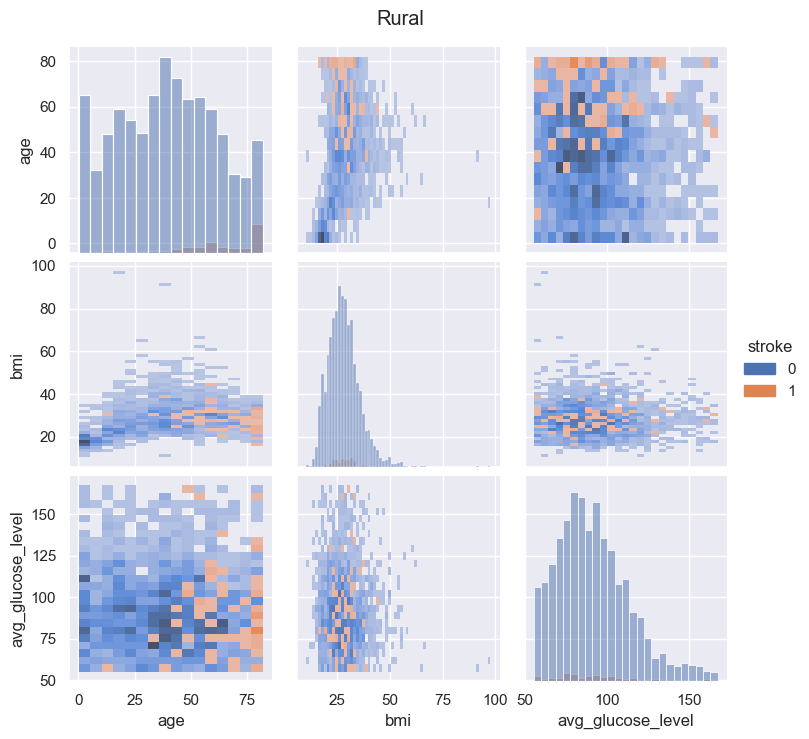

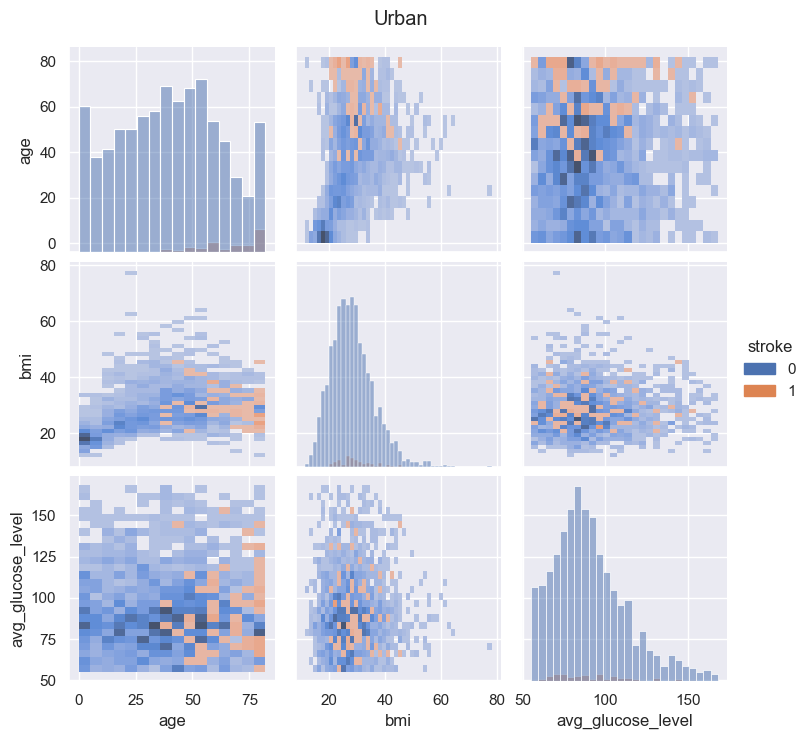

In [88]:
df_new = df
drop = ["id"]
df_new = df_new.drop(drop, axis=1)
df_new = df_new[df_new["Residence_type"] == "Rural"].replace({"Male": 1, "Femal[e": 0})

g = sns.pairplot(df_new[["age", "bmi", "avg_glucose_level", "stroke"]], hue="stroke", kind="hist")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Rural')


df_new = df
drop = ["id"]
df_new = df_new.drop(drop, axis=1)
df_new = df_new[df_new["Residence_type"] == "Urban"].replace({"Male": 1, "Femal[e": 0})

g2 = sns.pairplot(df_new[["age", "bmi", "avg_glucose_level", "stroke"]], hue="stroke", kind="hist")
g2.fig.subplots_adjust(top=0.93)
g2.fig.suptitle('Urban')

plt.show()

As a result of data analysis, it became clear that the place of residence has almost no effect on human health. 
Such results can be explained by the fact that the data were collected in Europe, and there, unlike in Russia, there is no problem to get to the nearest city if qualified assistance is required. The distance is much smaller + local hospitals also have sufficient qualifications.

There is a strong difference in performance between groups of people from towns and villages who have never worked, but this can be attributed to a small sample (only 10 people with such data)

I would also like to note a noticeable difference in the incidence of stroke between women with heart problems from an urban environment (4%) and women with heart problems from rural areas (17.5%). It is difficult to say what caused this, but it is so.

# Data transformation

In [97]:
new_df = df
new_df['smoking_level'] = new_df["smoking_status"].map({'never smoked': 0 ,'Unknown': 1, 'formerly smoked': 2, 'smokes': 3})
new_df['is_bmi_ok'] = np.where((df["bmi"] > 18.5) & (df["bmi"] < 25), True, False)
new_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_level,is_bmi_ok
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,False
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,0,False
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0,True
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,1,True
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,1,True
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,False
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,False
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,2,False
